## Support Vector Machines

### Import diabetes dataset and read the columns. Split the dataset into test and train. Scale it using MinMaxScaler

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [3]:
lr = LogisticRegression(); nb= GaussianNB(); knn = KNeighborsClassifier(); dt= DecisionTreeClassifier()
rf = RandomForestClassifier();

In [4]:
svmdata = pd.read_csv('diabetes.csv')

In [5]:
svmdata.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Removing all the non zero values and replacing them using the Median

In [6]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    svmdata[column] = svmdata[column].replace(0, np.NaN)
    mean = int(svmdata[column].mean(skipna=True))
    svmdata[column] = svmdata[column].replace(np.NaN, mean)

In [7]:
svmdata.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
##Splitting the data and transforming the data using Min max sclaer 

In [9]:
y = svmdata['Outcome']
x = svmdata.drop('Outcome', axis = 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.20)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Train the model and find accuracy

In [13]:
classifier = SVC(random_state=0, kernel='rbf')
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [16]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[98  9]
 [22 25]]
0.617283950617284
0.7987012987012987


### Use hyperparameters for model tuning. Try with various values of C and kernel and find the best model. Use Grid search for this purpose. 

#### Try for C value 0.1, 0.5, 1, 5, 10
#### Try for kernels linear, rbf, poly, sigmoid
#### use cv=3

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
model = SVC()

params = {'C': [0.1, 0.5, 1, 5, 10], 
          'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

In [19]:
gsmodel = GridSearchCV(model, param_grid=params, n_jobs=-1, cv = 3)

In [20]:
gsmodel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 0.5, 1, 5, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
print("Best Hyper Parameters:",gsmodel.best_params_)

Best Hyper Parameters: {'C': 5, 'kernel': 'rbf'}


### Report your findings on the best model

Model Works best with the following parameters: 'C': 0.5, 'kernel': 'rbf'. Since there are outliers in few of the features, and correlation is also low for most features assuming that the model works better with slightly lower sensitivity(C Value).

#### Use the best params and classify test data and report the findings

In [23]:
classifier = SVC(random_state=0, C= 0.5, kernel= 'rbf')
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [26]:

cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[101   6]
 [ 24  23]]
0.6052631578947368
0.8051948051948052


## Recommendation systems - Collaborative filtering

#### About Book Crossing Dataset
This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0

#### Link to dataset files
http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

#### Objective
This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches

### Import all the necessary libraries and datasets

Import books.csv, users.csv, ratings.csv

Use ";" as separator while importing the datasets.

Use encoding='latin-1' and error_bad_lines=False while importing the datasets.

Example: df = pd.read_csv("df.csv", sep=";", error_bad_lines=False, encoding="latin-1")

books dataset columns - 'ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL'

users dataset columns - 'userID', 'Location', 'Age'

ratings dataset columns - 'userID', 'ISBN', 'bookRating'

Check shape of each dataset using shape function

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import re
import seaborn as sns

In [30]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [31]:
print("books shape:", books.shape)
print("users shape:", users.shape)
print("ratings shape:", ratings.shape)

books shape: (271360, 8)
users shape: (278858, 3)
ratings shape: (1149780, 3)


In [32]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


### Drop last three columns containing image URLs which will not be required for analysis

In [33]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [34]:
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis = 1,  inplace = True)

In [35]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher'], dtype='object')

### check the unique values of yearOfPublication

In [36]:
books.sample(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
260434,0425156893,Tell Me a Tale: A Novel of the Old South,James McEachin,1997,Berkley Publishing Group
17251,0684857340,...AND THE HORSE HE RODE IN ON : THE PEOPLE V....,James Carville,1998,Simon &amp; Schuster
183457,037382162X,Cupid Connection (Family),Leandra Logan,1999,Harlequin Books
103761,0684863189,The Cheese Lover's Cookbook and Guide: Over 15...,Paula Lambert,2000,Simon &amp; Schuster
217548,0060237546,Cat call,Louise Lawrence,1980,Harper &amp; Row
247545,0307747107,Sgt. Murphy Busiest Day Ever,Golden Books,1992,Golden Books
146259,1575661802,The Circular Staircase,Mary Roberts Rinehart,1997,Kensington Publishing Corporation
12537,0140282777,Big Fish: A Novel of Mythic Proportions,Daniel Wallace,1999,Penguin Books
5288,0142000671,Of Mice and Men,John Steinbeck,2002,Penguin Books
30981,0874778883,Seven Years in Tibet,Heinrich Harrer,1997,Jeremy P. Tarcher


In [37]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.
Also some of the entries are strings and same years have been entered as numbers in some places

### Check the rows having 'DK Publishing Inc' as yearOfPublication and drop those rows

In [38]:
##the same is being asked to drop at the bottom

### Drop rows with yearOfPublication as 'Gallimard' and 'DK Publishing Inc'

In [39]:
books.drop(books.loc[books['yearOfPublication']=='DK Publishing Inc'].index, inplace=True)
books.drop(books.loc[books['yearOfPublication']=='Gallimard'].index, inplace=True)

### Change the datatype of yearOfPublication to 'int32'

In [40]:
books['yearOfPublication'] = books['yearOfPublication'].astype('int32')
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271357 non-null object
bookTitle            271357 non-null object
bookAuthor           271356 non-null object
yearOfPublication    271357 non-null int32
publisher            271355 non-null object
dtypes: int32(1), object(4)
memory usage: 11.4+ MB


### drop NaNs in 'publisher' column

In [41]:
books.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

In [42]:
books.dropna(inplace =True, subset = ['publisher'])
books.dropna(inplace =True, subset = ['bookAuthor'])

In [43]:
books.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
dtype: int64

### Users dataset:

### List out the unique age values from age column

In [44]:
users.columns

Index(['userID', 'Location', 'Age'], dtype='object')

In [45]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

### Values below 5 and above 90 do not make much sense for our book rating case. Hence replace these by NaNs

In [46]:
users[users['Age']<=5].count()

userID      908
Location    908
Age         908
dtype: int64

In [47]:
users[users['Age']>90].count()

userID      430
Location    430
Age         430
dtype: int64

In [48]:
users['Age'].where(((users['Age'] > 5)&(users['Age'] < 90)), np.NaN, inplace = True)

In [49]:
users[users['Age']<=5].count()

userID      0
Location    0
Age         0
dtype: int64

In [50]:
users[users['Age']>90].count()

userID      0
Location    0
Age         0
dtype: int64

### Replace null values with mean in Age column and  change datatype to int32

In [51]:
users['Age'].isna().sum()


112105

In [52]:
users['Age'].fillna(users['Age'].mean(), inplace=True)

In [53]:
users['Age'].isna().sum()

0

In [54]:
users['Age'] = users['Age'].astype('int32')

In [55]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         278858 non-null int32
dtypes: int32(1), int64(1), object(1)
memory usage: 5.3+ MB


### Ratings dataset

Ratings dataset will have n_users*n_books entries.

In [56]:
n_users = users.shape[0]
n_books = books.shape[0]
print(n_users * n_books)

75669233732


### Ratings dataset should have books only which exist in our books dataset. Create a new dataset which has only ratings of books present in books dataset. Use ISBN column as common column. Hint: check isin()

In [57]:
ratings.columns

Index(['userID', 'ISBN', 'bookRating'], dtype='object')

In [58]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher'], dtype='object')

In [59]:
rating_new = ratings[ratings["ISBN"].isin(books["ISBN"])]

In [60]:
rating_new.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Check the old ratings and new ratings shape

In [65]:
print(ratings.shape)
print(rating_new.shape)

(1149780, 3)
(1031129, 3)


It can be seen that many rows having book ISBN not part of books dataset got dropped off

### Similarly, the ratings dataset should contain information only about users present in Users dataset. Filter out records of only those users present in users dataset from the ratings dataset. Use userID as the common column. Hint: check isin() 

In [66]:
rating_new2 = rating_new[rating_new["userID"].isin(users["userID"])]

In [67]:
rating_new2.shape

(1031129, 3)

### Check unique book ratings

In [70]:
np.unique(rating_new.bookRating)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

### Segregate dataset into two. One with only 0 ratings and the rest with other ratings.

In [71]:
low_rating = rating_new2[rating_new2["bookRating"] == 0]
high_rating = rating_new2[rating_new2["bookRating"] != 0]

In [72]:
print(low_rating.head())
print(low_rating.shape)
print(low_rating['bookRating'].unique())

    userID        ISBN  bookRating
0   276725  034545104X           0
2   276727  0446520802           0
5   276733  2080674722           0
10  276746  0425115801           0
11  276746  0449006522           0
(647291, 3)
[0]


In [73]:
print(high_rating.head())
print(high_rating.shape)
print(high_rating['bookRating'].unique())

    userID        ISBN  bookRating
1   276726  0155061224           5
3   276729  052165615X           3
4   276729  0521795028           6
8   276744  038550120X           7
16  276747  0060517794           9
(383838, 3)
[ 5  3  6  7  9  8 10  1  4  2]


### Plot the ratings data using countplot. Use bookRating in X axis

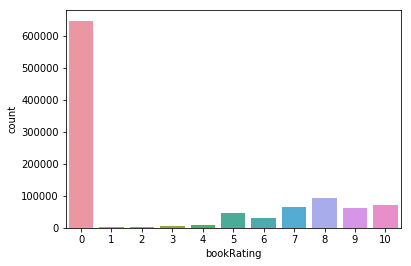

In [74]:
sns.countplot(x=rating_new2["bookRating"])

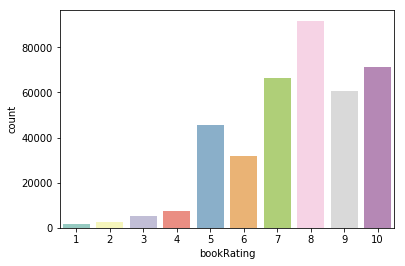

In [75]:
sns.countplot(x=high_rating["bookRating"], palette="Set3")

### For more accurate results only consider users who have rated atleast 100 books

Take value counts of userId column into a separate Series or DF.

From ratings dataset having ratings 1 to 9, filter only rows for those users who have rated atleast 100 times.

Use isin.

example: 

df_cnt =  df.column.value_counts()

ratings_df = ratings_df[ratings_df.column.isin(df_cnt[df_cnt >=100].index)]

In [76]:
df_cnt = high_rating["userID"].value_counts()
df_cnt

11676     6943
98391     5689
189835    1899
153662    1845
23902     1180
235105    1020
76499     1012
171118     962
16795      959
248718     941
56399      837
197659     781
35859      777
185233     698
95359      606
114368     603
158295     567
101851     563
177458     524
204864     504
93047      501
69078      499
182085     498
135149     487
100906     484
107784     482
78973      479
23872      478
60244      476
257204     475
          ... 
216045       1
211939       1
251025       1
177106       1
173008       1
142273       1
123832       1
81059        1
83116        1
89263        1
267369       1
44433        1
42384        1
23951        1
33787        1
13698        1
269575       1
265477       1
261371       1
214252       1
109745       1
195803       1
179411       1
154831       1
152782       1
148684       1
124088       1
105655       1
103606       1
211175       1
Name: userID, Length: 68091, dtype: int64

In [77]:
ratings_df = high_rating[high_rating["userID"].isin(df_cnt[df_cnt >=100].index)]

In [78]:
ratings_df.head(20)

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9
1477,277427,0062507109,8
1483,277427,0132220598,8
1488,277427,0140283374,6
1490,277427,014039026X,8
1491,277427,0140390715,7


In [79]:
ratings_df['userID'].unique()

array([277427, 278418,   2033,   2110,   2276,   4017,   4385,   5582,
         6242,   6251,   6543,   6575,   7286,   7346,   8067,   8245,
         8681,   8890,  10560,  11676,  11993,  12538,  12824,  12982,
        13552,  13850,  14422,  15408,  15418,  16634,  16795,  16966,
        17950,  19085,  21014,  23768,  23872,  23902,  25409,  25601,
        25981,  26535,  26544,  26583,  28591,  28634,  29259,  30276,
        30511,  30711,  30735,  30810,  31315,  31556,  31826,  32773,
        33145,  35433,  35836,  35857,  35859,  36299,  36554,  36606,
        36609,  36836,  36907,  37644,  37712,  37950,  38023,  38273,
        38281,  39281,  39467,  40889,  40943,  43246,  43910,  46398,
        47316,  48025,  48494,  49144,  49889,  51883,  52199,  52350,
        52584,  52614,  52917,  53220,  55187,  55490,  55492,  56271,
        56399,  56447,  56554,  56959,  59172,  60244,  60337,  60707,
        63714,  63956,  65258,  66942,  67840,  68555,  69078,  69389,
      

### Generating ratings matrix from explicit ratings table

Since NaNs cannot be handled by training algorithms, replacing those by 0, which indicates absence of ratings.

Example.

ratings_matrix = ratingdf.pivot(index='userID', columns='ISBN', values='bookRating').fillna(0)

In [83]:
ratings_matrix = ratings_df.pivot(index='userID', columns='ISBN', values='bookRating').fillna(0)
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(449, 66572)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Import svds from scipy.sparse.linalg and pass the ratings matrix to it with k=50

Example: U, sigma, Vt = svds(ratings_matrix, k = 50)

Take only the diag value from sigma and do a dot product of the same with U. 

Do another dot product of the result with V. 

Assign the final resultant matrix to another new matrix. 

Convert this matrix to a dataframe with columns as that of the above ratings_matrix. The ratings_matrix was calculated above using the pivot() function of the dataframe.

In [84]:
from scipy.sparse.linalg import svds, eigs

In [85]:
U, sigma, Vt = svds(ratings_matrix, k = 50)

In [86]:
sigma = np.diag(sigma)

In [87]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [88]:
all_user_predicted_ratings

array([[ 2.53413396e-02, -2.14623005e-03, -1.43082004e-03, ...,
         1.19754797e-04, -1.69335636e-03,  6.75032653e-02],
       [-1.00123158e-02, -3.66944542e-03, -2.44629695e-03, ...,
        -2.41938710e-04,  2.91532927e-05, -1.30588632e-02],
       [-1.50543571e-02, -1.54565959e-02, -1.03043973e-02, ...,
        -3.03637070e-04,  9.00887045e-03, -5.76922555e-02],
       ...,
       [ 3.81433419e-03, -1.11407816e-02, -7.42718773e-03, ...,
         1.74016504e-03,  8.52624532e-03,  1.26062064e-01],
       [ 7.80204879e-02, -2.44385752e-02, -1.62923834e-02, ...,
         3.02176041e-04,  1.01777285e-02,  3.59761492e-02],
       [ 8.05621362e-03,  1.16247449e-02,  7.74982991e-03, ...,
         8.58215920e-05, -3.24030447e-04,  7.47563413e-03]])

In [89]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns, index = ratings_matrix.index)

In [90]:
preds_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.025341,-0.002146,-0.001431,-0.002146,-0.002146,0.002971,-0.003920,0.007035,0.007035,0.012316,...,0.000180,0.000226,0.042081,-0.016804,-0.080028,0.004746,0.028314,0.000120,-0.001693,0.067503
2110,-0.010012,-0.003669,-0.002446,-0.003669,-0.003669,0.001075,0.001440,-0.003500,-0.003500,0.001612,...,-0.000363,0.000403,0.008142,0.001104,-0.029224,0.000999,0.002363,-0.000242,0.000029,-0.013059
2276,-0.015054,-0.015457,-0.010304,-0.015457,-0.015457,0.007281,-0.014033,0.011941,0.011941,0.011796,...,-0.000455,0.001907,0.047982,0.005737,0.117859,0.006945,0.003119,-0.000304,0.009009,-0.057692
4017,-0.021499,0.035602,0.023735,0.035602,0.035602,0.030307,0.024215,-0.001053,-0.001053,0.067579,...,0.002971,0.009912,0.086248,-0.008818,0.016154,0.028848,-0.000125,0.001981,0.031201,-0.046664
4385,0.002077,-0.007965,-0.005310,-0.007965,-0.007965,0.002947,0.003057,0.000231,0.000231,0.006080,...,0.002120,0.001597,-0.012181,0.009420,0.673459,0.002591,-0.008229,0.001413,0.004918,0.047773


### Take a particular user id - user id=2

In [91]:
#Print the user id associated with the second record in the dataframe

In [92]:
Recordno = 1
userid = preds_df.index[Recordno]
print(userid)

2110


In [93]:
#sort the predictions of the user chosen into descending order from the predicted df above. 
#You will get a series. Hint: use iloc[user_id]
sorted_user_predictions = pd.DataFrame(preds_df.loc[userid].sort_values(ascending=False))

In [94]:
sorted_user_predictions.reset_index(inplace = True)
sorted_user_predictions.head()

,ISBN,2110
0,059035342X,0.682444
1,0345370775,0.368946
2,0345384911,0.333624
3,043935806X,0.333209
4,044021145X,0.329336


In [95]:
sorted_user_predictions.columns = sorted_user_predictions.columns.map(str)

In [96]:
sorted_user_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66572 entries, 0 to 66571
Data columns (total 2 columns):
ISBN    66572 non-null object
2110    66572 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


In [97]:
sorted_user_predictions['2110'].unique()

array([ 0.68244361,  0.36894571,  0.3336239 , ..., -0.06098071,
       -0.06134816, -0.06718795])

### Get all books that this particular user has interacted with.

Hint: filter the ratings df associated with ratings 1 to 9 for this user id alone. Filter using the userID column and pass the userID obtained above from the ratings matrix.

Once the user_data is obtained, you will get a dataframe with userID = user ID value and ISBN and Ratings.

In [98]:
user_data = ratings_df[ratings_df.userID == (userid)]

In [99]:
print(user_data.shape)

(103, 3)


In [100]:
print(user_data.columns)

Index(['userID', 'ISBN', 'bookRating'], dtype='object')


In [101]:
user_predicted = sorted_user_predictions[sorted_user_predictions['ISBN'].isin(user_data["ISBN"])]

In [102]:
user_predicted = pd.merge(user_data, sorted_user_predictions, on = 'ISBN')

In [103]:
user_predicted = user_predicted.rename(columns={'2110': 'Predictedrating'})

In [104]:
user_predicted.head()

,userID,ISBN,bookRating,Predictedrating
0,2110,0060987529,7,0.058987
1,2110,0064472779,8,0.009379
2,2110,0140022651,10,0.007412
3,2110,0142302163,8,0.005929
4,2110,0151008116,5,0.021833


### Get the book data for this particular user. For this you need to filter using the ISBN column present in the above userdata dataframe

In [105]:
book_data = books[books["ISBN"].isin(user_predicted["ISBN"])]

In [106]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
246,0151008116,Life of Pi,Yann Martel,2002,Harcourt
904,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001,Magic Carpet Books
1000,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
1302,0345307674,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books
1472,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984,Pocket


### Merge both the book data and user data as a single dataframe. Hint: Use merge function. 
#### Check how many books the user has rated. Hint: use shape

In [107]:
recommendations = pd.merge(user_predicted, book_data, on = 'ISBN')

In [109]:
print(recommendations.shape)
recommendations.head()

(103, 8)


,userID,ISBN,bookRating,Predictedrating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,0.058987,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,0.009379,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,0.007412,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,0.005929,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,0.021833,Life of Pi,Yann Martel,2002,Harcourt


### Get top 10 recommendations for above given userID

#### Use Predictions column and sort the same as descending order

In [110]:
# Top 10 Rows based on Actual Rating
recommendations.nlargest(10, 'bookRating')

,userID,ISBN,bookRating,Predictedrating,bookTitle,bookAuthor,yearOfPublication,publisher
2,2110,0140022651,10,0.007412,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
6,2110,0345260627,10,0.007412,Splinter of the Mind's Eye,Alan Dean Foster,1978,Ballantine Books
7,2110,0345283554,10,0.007412,Han Solo at Stars' End,Daley,1979,Not Avail
8,2110,0345283929,10,0.126359,Empire Strikes Back Wars,Donald F Glut,1980,Ballantine Books
9,2110,034528710X,10,0.007412,Han Solo and the Lost Legacy,Brian Daley,1980,Del Rey Books
10,2110,0345307674,10,0.114533,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books
11,2110,0345314255,10,0.177760,Sword of Shannara,Terry Brooks,1995,Del Rey Books
12,2110,0345317580,10,0.219552,Magic Kingdom for Sale - Sold! (Magic Kingdom ...,Terry Brooks,1990,Del Rey Books
13,2110,0345335287,10,0.223613,The Black Unicorn (Magic Kingdom of Landover N...,Terry Brooks,1990,Del Rey Books
14,2110,0345362276,10,0.114498,Wizard at Large (Rookies Series),Terry Brooks,1989,Del Rey Books


In [111]:
# Top 10 Rows based on Predicted Rating
recommendations.nlargest(10, 'Predictedrating')

,userID,ISBN,bookRating,Predictedrating,bookTitle,bookAuthor,yearOfPublication,publisher
55,2110,059035342X,10,0.682444,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
13,2110,0345335287,10,0.223613,The Black Unicorn (Magic Kingdom of Landover N...,Terry Brooks,1990,Del Rey Books
12,2110,0345317580,10,0.219552,Magic Kingdom for Sale - Sold! (Magic Kingdom ...,Terry Brooks,1990,Del Rey Books
11,2110,0345314255,10,0.177760,Sword of Shannara,Terry Brooks,1995,Del Rey Books
45,2110,0451137965,9,0.133481,Thinner,Stephen King,1985,New Amer Library
8,2110,0345283929,10,0.126359,Empire Strikes Back Wars,Donald F Glut,1980,Ballantine Books
10,2110,0345307674,10,0.114533,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books
14,2110,0345362276,10,0.114498,Wizard at Large (Rookies Series),Terry Brooks,1989,Del Rey Books
78,2110,0671751174,10,0.103658,First Evil (Fear Street Cheerleaders 1) : Firs...,R.L. Stine,1992,Simon Pulse
47,2110,051512463X,8,0.070114,The Cat Who Sang for the Birds (Cat Who... (Pa...,Lilian Jackson Braun,1999,Jove Books
